# 🏥 Machine Learning for Healthcare Professionals
### A Magical Journey Through AI in Medicine

Welcome to your adventure in machine learning! In this notebook, you'll meet three powerful ML "helpers" that work in our magical hospital, each with their own special abilities to help predict patient outcomes.

---

## 📚 Setup: Importing Our Medical Tools

Just like a doctor needs their medical instruments, we need to import our data science tools!

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Our three ML models!
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Make plots look nice
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All tools imported successfully! Ready to begin our ML journey.")

✅ All tools imported successfully! Ready to begin our ML journey.


---
## 🩺 Our Patient Data: Heart Disease Dataset

We'll use a classic heart disease dataset. Think of this as patient records from our magical hospital!

**What we're predicting:** Does the patient have heart disease? (Yes=1, No=0)

**Clinical Variables:**
- Age
- Sex (1=male, 0=female)
- Chest pain type (0-3)
- Resting blood pressure
- Cholesterol
- Fasting blood sugar > 120 mg/dl
- Resting ECG results
- Maximum heart rate achieved
- Exercise induced angina
- ST depression
- Slope of peak exercise ST segment
- Number of major vessels colored by fluoroscopy
- Thalassemia type

In [2]:
# Create sample heart disease data (in real scenarios, you'd load from a file)
from sklearn.datasets import make_classification

# Generate synthetic heart disease data
X, y = make_classification(
    n_samples=300,
    n_features=13,
    n_informative=10,
    n_redundant=3,
    random_state=42,
    n_classes=2,
    class_sep=0.8
)

# Create a DataFrame with meaningful column names
feature_names = ['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
                 'rest_ecg', 'max_hr', 'exercise_angina', 'st_depression', 
                 'st_slope', 'vessels', 'thalassemia']

df = pd.DataFrame(X, columns=feature_names)
df['heart_disease'] = y

# Display first few patients
print("👥 First 5 patients in our dataset:")
print(df.head())
print(f"\n📊 Total patients: {len(df)}")
print(f"❤️ Patients with heart disease: {y.sum()} ({y.sum()/len(y)*100:.1f}%)")
print(f"💚 Patients without heart disease: {len(y)-y.sum()} ({(len(y)-y.sum())/len(y)*100:.1f}%)")

👥 First 5 patients in our dataset:
        age       sex  chest_pain   rest_bp  cholesterol  fasting_bs  \
0 -3.093116 -2.912408   -3.905703 -2.144932    -2.306030    0.789066   
1 -0.588945  0.124804   -9.028226 -1.873530     4.257775    3.932819   
2  0.085152  1.323029    4.896440 -0.696194     0.149300   -2.950203   
3  0.714972  0.431260   -2.651026  0.798090    -2.058929    0.572692   
4  1.036794  2.564554   -1.678513  1.395080    -2.018565    0.074817   

   rest_ecg    max_hr  exercise_angina  st_depression  st_slope   vessels  \
0 -0.385772 -1.230924         0.067991       1.960597 -4.391750  1.944955   
1 -1.194965  1.346187        -2.657960      -0.195843 -2.565543  0.420535   
2  1.342339 -1.887660         0.473166      -2.764621 -1.504524  2.059959   
3 -1.313709  0.947250        -2.138916       2.187660  2.279683 -1.909759   
4  1.779399  0.840812        -0.496436       0.252855  0.449907 -0.009977   

   thalassemia  heart_disease  
0    -1.261665              1  
1    

---
## 🔬 Preparing Our Data

Before our ML helpers can work, we need to prepare the data - like organizing patient charts before rounds!

In [3]:
# Separate features (X) and target (y)
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Split into training and testing sets (like teaching vs. testing medical students)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features (standardization)
# This is like converting all measurements to the same units
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"📚 Training set: {len(X_train)} patients")
print(f"🧪 Testing set: {len(X_test)} patients")
print("\n✅ Data is ready! Let's meet our three ML helpers!")

📚 Training set: 240 patients
🧪 Testing set: 60 patients

✅ Data is ready! Let's meet our three ML helpers!


---
# 🤖 Model 1: Dr. Logic (Logistic Regression)

## Meet Dr. Logic!

Dr. Logic is the **most transparent** of our AI helpers. They work just like a clinical risk calculator!

**How Dr. Logic thinks:**
- Takes each risk factor (age, cholesterol, etc.)
- Assigns it a weight (like a point system)
- Adds them all up with a special formula
- Gives you a probability: "There's a 75% chance this patient has heart disease"

**Real-world examples:**
- CHADS-VASc score for stroke risk
- APACHE scoring for ICU mortality
- Framingham Risk Score for cardiovascular disease

**Why healthcare pros love Dr. Logic:**
✅ **Explainable:** You can see exactly which factors matter most  
✅ **Gives probabilities:** Not just yes/no, but "how certain"  
✅ **Works with clinical intuition:** Similar to how you naturally weigh risk factors

In [4]:
# Create and train Dr. Logic
print("🎓 Training Dr. Logic on our patient data...\n")

dr_logic = LogisticRegression(random_state=42, max_iter=1000)
dr_logic.fit(X_train_scaled, y_train)

# Make predictions
logic_predictions = dr_logic.predict(X_test_scaled)
logic_probabilities = dr_logic.predict_proba(X_test_scaled)[:, 1]

# Evaluate performance
logic_accuracy = accuracy_score(y_test, logic_predictions)
logic_auc = roc_auc_score(y_test, logic_probabilities)

print(f"🎯 Dr. Logic's Performance:")
print(f"   Accuracy: {logic_accuracy:.2%}")
print(f"   AUC Score: {logic_auc:.3f}")
print("\n📊 Detailed Report:")
print(classification_report(y_test, logic_predictions, target_names=['No Disease', 'Heart Disease']))

🎓 Training Dr. Logic on our patient data...

🎯 Dr. Logic's Performance:
   Accuracy: 81.67%
   AUC Score: 0.901

📊 Detailed Report:
               precision    recall  f1-score   support

   No Disease       0.83      0.80      0.81        30
Heart Disease       0.81      0.83      0.82        30

     accuracy                           0.82        60
    macro avg       0.82      0.82      0.82        60
 weighted avg       0.82      0.82      0.82        60



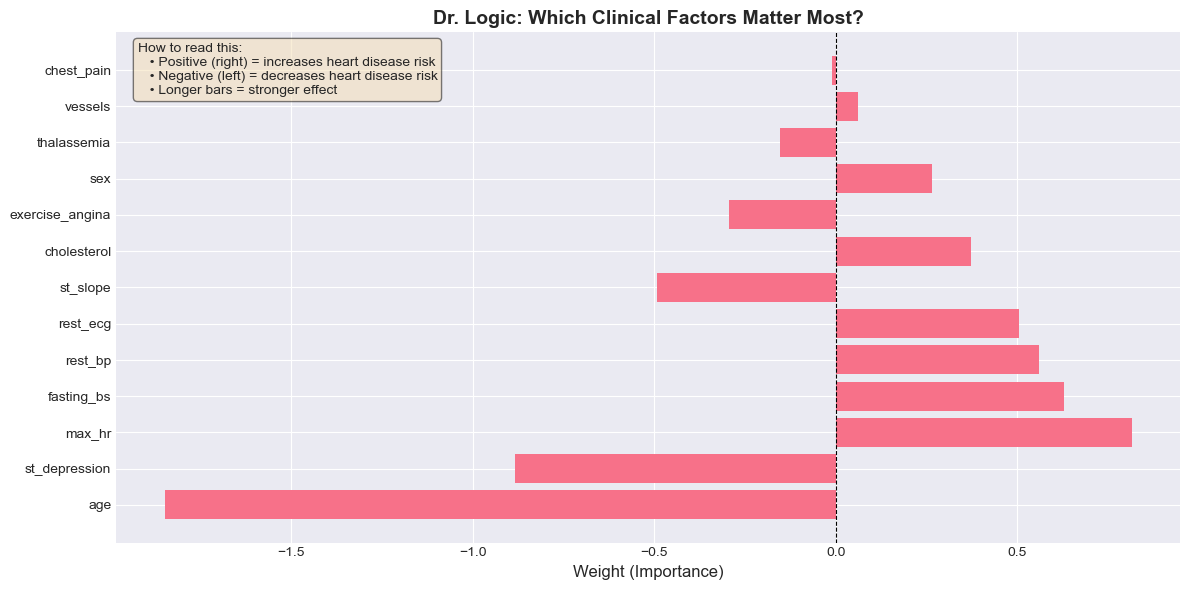


Key Insight: Dr. Logic shows us EXACTLY how each clinical variable
   contributes to the prediction - just like reading a scoring system!


In [7]:
# Visualize which clinical features matter most to Dr. Logic
plt.figure(figsize=(12, 6))

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': dr_logic.coef_[0]
}).sort_values('importance', key=abs, ascending=False)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Weight (Importance)', fontsize=12)
plt.title('Dr. Logic: Which Clinical Factors Matter Most?', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)

# Add interpretation
plt.text(0.02, 0.98, 
         'How to read this:\n' +
         '   • Positive (right) = increases heart disease risk\n' +
         '   • Negative (left) = decreases heart disease risk\n' +
         '   • Longer bars = stronger effect',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=10)

plt.tight_layout()
plt.show()

print("\nKey Insight: Dr. Logic shows us EXACTLY how each clinical variable")
print("   contributes to the prediction - just like reading a scoring system!")

---
# 🌳 Model 2: Dr. Tree (Random Forest)

## Meet Dr. Tree!

Dr. Tree thinks in **decision trees** - just like clinical algorithms!

**How Dr. Tree thinks:**
- "Is cholesterol > 240? If yes, go left. If no, go right."
- "Is age > 65? If yes, higher risk. If no, check next factor."
- Makes many trees and takes a vote (that's the "forest" part!)

**Real-world clinical example:**
```
Patient has chest pain?
├─ Yes → Is it crushing/substernal?
│  ├─ Yes → High risk, order troponin
│  └─ No → Is it worse with exertion?
└─ No → Consider other diagnoses
```

**Why healthcare pros love Dr. Tree:**
✅ **Intuitive:** Matches how clinicians naturally make decisions  
✅ **Handles messy data:** Works with missing values and mixed data types  
✅ **Shows what matters:** Tells you which variables are most important  
✅ **Non-linear:** Catches complex interactions ("high cholesterol matters more if patient is older")

In [8]:
# Create and train Dr. Tree
print("🌲 Growing Dr. Tree's forest of decision trees...\n")

dr_tree = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,
    max_depth=10
)
dr_tree.fit(X_train, y_train)  # Note: Random Forests don't need scaled data!

# Make predictions
tree_predictions = dr_tree.predict(X_test)
tree_probabilities = dr_tree.predict_proba(X_test)[:, 1]

# Evaluate performance
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_auc = roc_auc_score(y_test, tree_probabilities)

print(f"🎯 Dr. Tree's Performance:")
print(f"   Accuracy: {tree_accuracy:.2%}")
print(f"   AUC Score: {tree_auc:.3f}")
print("\n📊 Detailed Report:")
print(classification_report(y_test, tree_predictions, target_names=['No Disease', 'Heart Disease']))

🌲 Growing Dr. Tree's forest of decision trees...

🎯 Dr. Tree's Performance:
   Accuracy: 85.00%
   AUC Score: 0.939

📊 Detailed Report:
               precision    recall  f1-score   support

   No Disease       0.86      0.83      0.85        30
Heart Disease       0.84      0.87      0.85        30

     accuracy                           0.85        60
    macro avg       0.85      0.85      0.85        60
 weighted avg       0.85      0.85      0.85        60



/var/folders/75/hdy4csjn5h730vl6_hd51bgw0000gn/T/ipykernel_21130/2629486652.py:25: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/75/hdy4csjn5h730vl6_hd51bgw0000gn/T/ipykernel_21130/2629486652.py:25: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) Arial.
  plt.tight_layout()


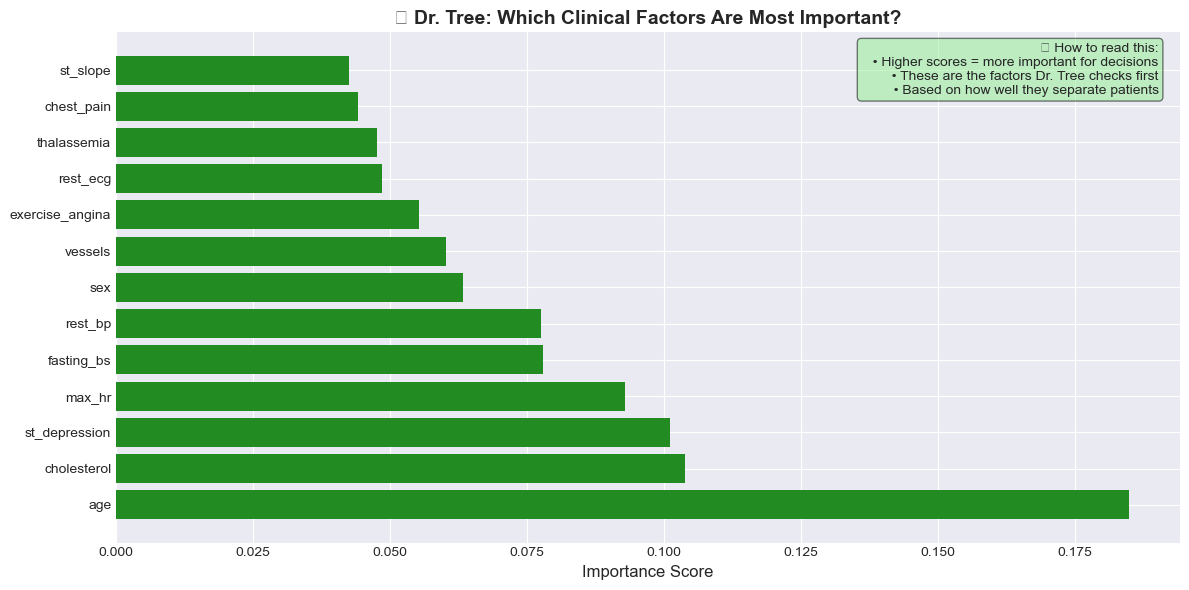


💡 Key Insight: Dr. Tree shows us which variables are most useful
   for splitting patients into risk groups - like triage criteria!


In [ ]:
# Visualize which clinical features Dr. Tree finds most important
plt.figure(figsize=(12, 6))

feature_importance_tree = pd.DataFrame({
    'feature': feature_names,
    'importance': dr_tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.barh(feature_importance_tree['feature'], feature_importance_tree['importance'], color='forestgreen')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Dr. Tree: Which Clinical Factors Are Most Important?', fontsize=14, fontweight='bold')

# Add interpretation (moved to right side)
plt.text(0.98, 0.98,
         'How to read this:\n' +
         '   • Higher scores = more important for decisions\n' +
         '   • These are the factors Dr. Tree checks first\n' +
         '   • Based on how well they separate patients',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
         fontsize=10)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Dr. Tree shows us which variables are most useful")
print("   for splitting patients into risk groups - like triage criteria!")

---
# 🧠 Model 3: Dr. Neural (Neural Network)

## Meet Dr. Neural!

Dr. Neural is our most **sophisticated** helper - they learn complex patterns that even humans might miss!

**How Dr. Neural thinks:**
- Has layers of "neurons" (like brain cells)
- Each neuron looks at patterns and passes info to the next layer
- Learns complex combinations: "high cholesterol + smoking + age > 60 = very high risk"
- Can find patterns that aren't obvious to humans

**Analogy for healthcare:**
Think of reading a chest X-ray:
- **First layer:** Detects edges and shapes
- **Middle layers:** Recognizes lung fields, heart borders
- **Final layer:** Integrates everything → "Pneumonia" or "Normal"

**Real-world medical examples:**
- Detecting diabetic retinopathy from eye scans
- Reading mammograms for breast cancer
- Analyzing pathology slides
- Interpreting ECGs

**What makes Dr. Neural special:**
✅ **Powerful:** Can learn very complex patterns  
⚠️ **Black box:** Hard to explain *why* it made a decision  
✅ **Great with images:** Excels at radiology, pathology, dermatology  
⚠️ **Needs lots of data:** Works best with thousands of examples

In [11]:
# Create and train Dr. Neural
print("🧠 Training Dr. Neural's neural network...\n")

dr_neural = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),  # Three hidden layers
    activation='relu',
    random_state=42,
    max_iter=1000
)
dr_neural.fit(X_train_scaled, y_train)  # Neural networks need scaled data

# Make predictions
neural_predictions = dr_neural.predict(X_test_scaled)
neural_probabilities = dr_neural.predict_proba(X_test_scaled)[:, 1]

# Evaluate performance
neural_accuracy = accuracy_score(y_test, neural_predictions)
neural_auc = roc_auc_score(y_test, neural_probabilities)

print(f"🎯 Dr. Neural's Performance:")
print(f"   Accuracy: {neural_accuracy:.2%}")
print(f"   AUC Score: {neural_auc:.3f}")
print("\n📊 Detailed Report:")
print(classification_report(y_test, neural_predictions, target_names=['No Disease', 'Heart Disease']))

🧠 Training Dr. Neural's neural network...

🎯 Dr. Neural's Performance:
   Accuracy: 86.67%
   AUC Score: 0.937

📊 Detailed Report:
               precision    recall  f1-score   support

   No Disease       0.87      0.87      0.87        30
Heart Disease       0.87      0.87      0.87        30

     accuracy                           0.87        60
    macro avg       0.87      0.87      0.87        60
 weighted avg       0.87      0.87      0.87        60



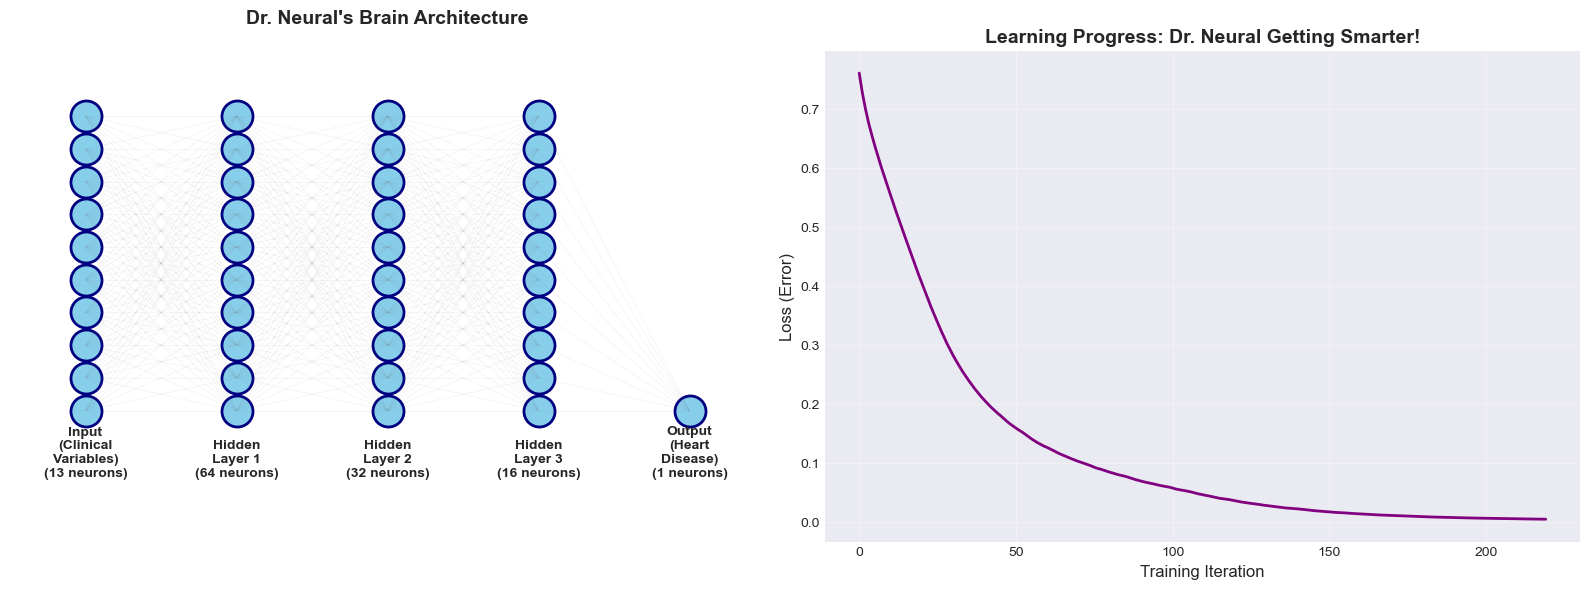


💡 Key Insight: Dr. Neural has multiple layers that learn increasingly
   complex patterns - like how radiologists learn to read X-rays!


In [13]:
# Visualize Dr. Neural's network architecture
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Network architecture
layer_sizes = [len(feature_names)] + list(dr_neural.hidden_layer_sizes) + [1]
layer_names = ['Input\n(Clinical\nVariables)', 'Hidden\nLayer 1', 'Hidden\nLayer 2', 'Hidden\nLayer 3', 'Output\n(Heart\nDisease)']

for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
    ax1.scatter([i] * min(size, 10), range(min(size, 10)), s=500, c='skyblue', edgecolors='navy', linewidth=2)
    ax1.text(i, -2, f"{name}\n({size} neurons)", ha='center', fontsize=10, fontweight='bold')

ax1.set_xlim(-0.5, len(layer_sizes)-0.5)
ax1.set_ylim(-4, 11)
ax1.axis('off')
ax1.set_title('Dr. Neural\'s Brain Architecture', fontsize=14, fontweight='bold', pad=20)

# Add connections visualization
for i in range(len(layer_sizes)-1):
    for j in range(min(layer_sizes[i], 10)):
        for k in range(min(layer_sizes[i+1], 10)):
            ax1.plot([i, i+1], [j, k], 'gray', alpha=0.1, linewidth=0.5)

# Right plot: Training progress
ax2.plot(dr_neural.loss_curve_, linewidth=2, color='purple')
ax2.set_xlabel('Training Iteration', fontsize=12)
ax2.set_ylabel('Loss (Error)', fontsize=12)
ax2.set_title('Learning Progress: Dr. Neural Getting Smarter!', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Dr. Neural has multiple layers that learn increasingly")
print("   complex patterns - like how radiologists learn to read X-rays!")

---
# ⚖️ The Grand Comparison: Which Doctor Performs Best?

Let's see how our three AI doctors compare on the same patients!

/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


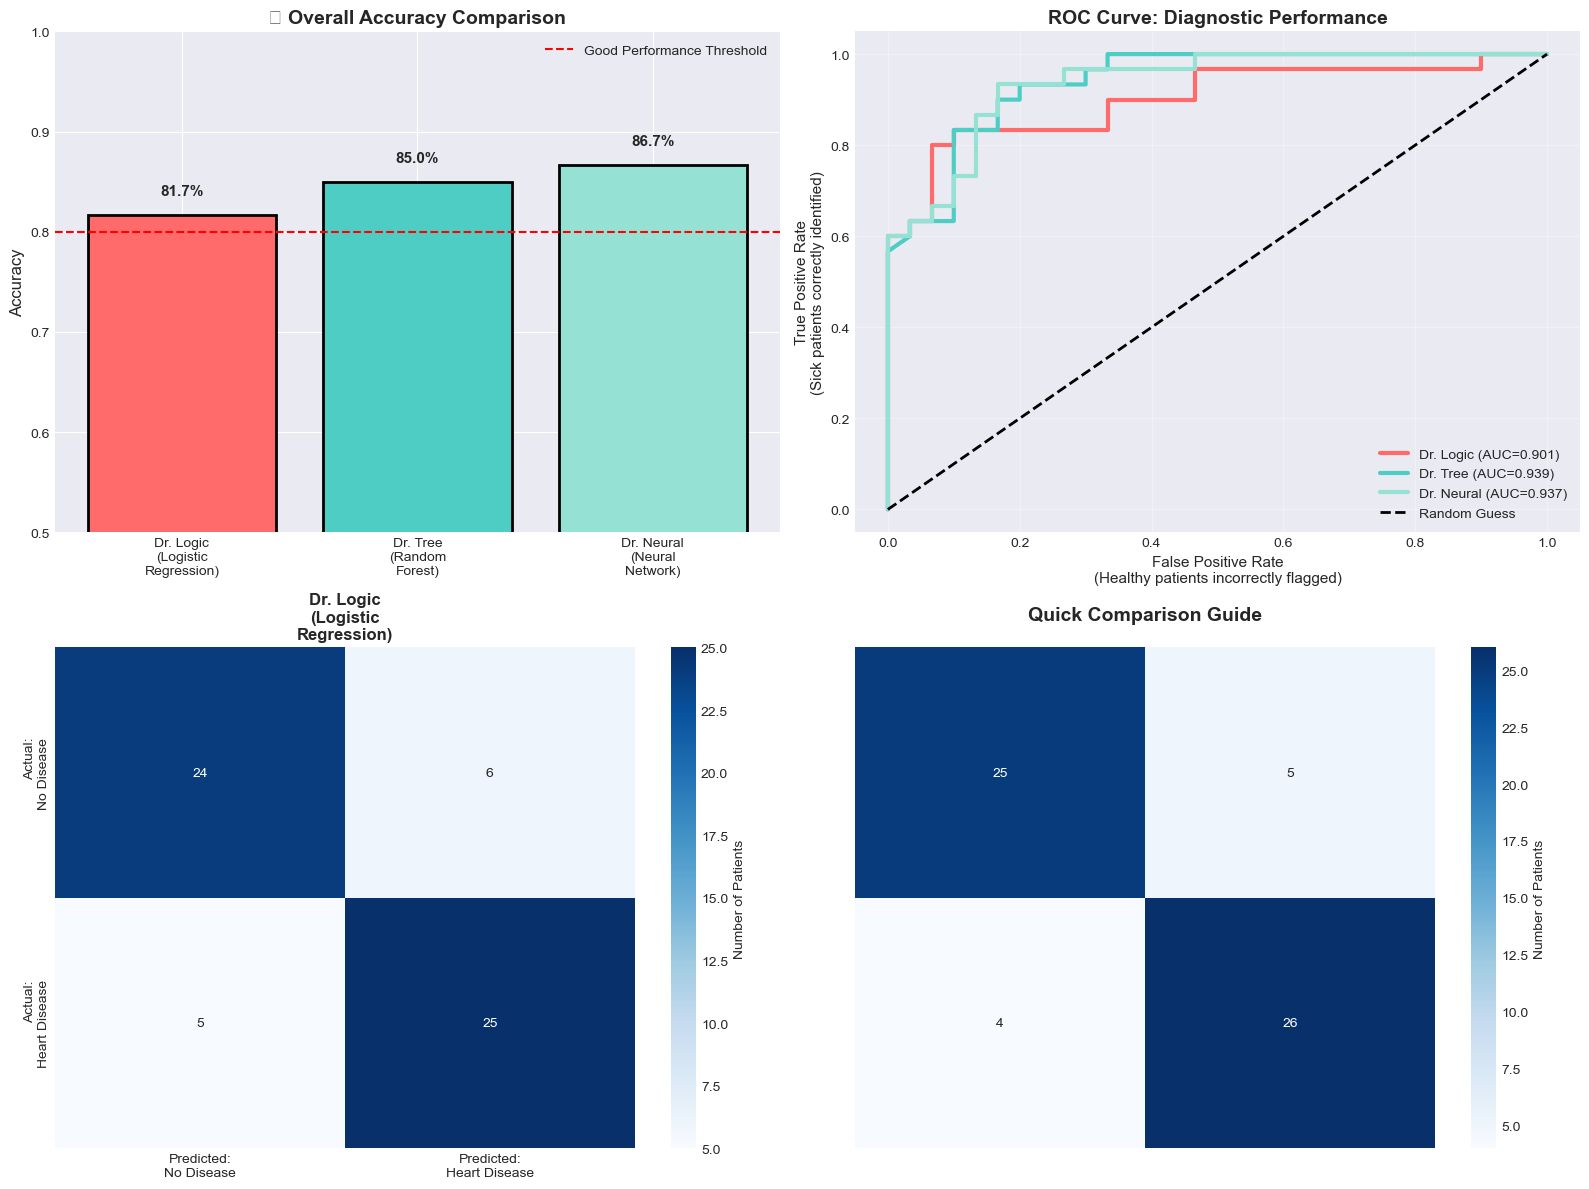

In [15]:
# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
models = ['Dr. Logic\n(Logistic\nRegression)', 'Dr. Tree\n(Random\nForest)', 'Dr. Neural\n(Neural\nNetwork)']
accuracies = [logic_accuracy, tree_accuracy, neural_accuracy]
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']

axes[0, 0].bar(models, accuracies, color=colors, edgecolor='black', linewidth=2)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('🎯 Overall Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim([0.5, 1.0])
axes[0, 0].axhline(y=0.8, color='red', linestyle='--', label='Good Performance Threshold')
axes[0, 0].legend()

for i, (model, acc) in enumerate(zip(models, accuracies)):
    axes[0, 0].text(i, acc + 0.02, f'{acc:.1%}', ha='center', fontweight='bold', fontsize=11)

# 2. ROC Curves - Shows true positive vs false positive rates
for name, probs, color in [
    ('Dr. Logic', logic_probabilities, colors[0]),
    ('Dr. Tree', tree_probabilities, colors[1]),
    ('Dr. Neural', neural_probabilities, colors[2])
]:
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    axes[0, 1].plot(fpr, tpr, linewidth=3, label=f'{name} (AUC={auc:.3f})', color=color)

axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
axes[0, 1].set_xlabel('False Positive Rate\n(Healthy patients incorrectly flagged)', fontsize=11)
axes[0, 1].set_ylabel('True Positive Rate\n(Sick patients correctly identified)', fontsize=11)
axes[0, 1].set_title('ROC Curve: Diagnostic Performance', fontsize=14, fontweight='bold')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion Matrices
cms = [
    confusion_matrix(y_test, logic_predictions),
    confusion_matrix(y_test, tree_predictions),
    confusion_matrix(y_test, neural_predictions)
]

for idx, (cm, model, color) in enumerate(zip(cms, models, colors)):
    if idx < 2:
        ax = axes[1, idx]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=['Predicted:\nNo Disease', 'Predicted:\nHeart Disease'],
                   yticklabels=['Actual:\nNo Disease', 'Actual:\nHeart Disease'],
                   cbar_kws={'label': 'Number of Patients'})
        ax.set_title(f'{model}', fontsize=12, fontweight='bold')

# 4. Summary comparison table
axes[1, 1].axis('off')
comparison_data = [
    ['Metric', 'Dr. Logic', 'Dr. Tree', 'Dr. Neural'],
    ['Accuracy', f'{logic_accuracy:.1%}', f'{tree_accuracy:.1%}', f'{neural_accuracy:.1%}'],
    ['AUC Score', f'{logic_auc:.3f}', f'{tree_auc:.3f}', f'{neural_auc:.3f}'],
    ['Interpretability', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐'],
    ['Complexity', '⭐', '⭐⭐⭐', '⭐⭐⭐⭐⭐'],
    ['Training Speed', '⚡⚡⚡', '⚡⚡', '⚡'],
]

table = axes[1, 1].table(cellText=comparison_data, cellLoc='center', loc='center',
                         colWidths=[0.3, 0.23, 0.23, 0.23])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)

# Style the header row
for i in range(4):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

axes[1, 1].set_title('Quick Comparison Guide', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

---
# 🎯 Making Predictions on New Patients

Let's see how our three doctors evaluate a brand new patient!

In [16]:
# Create a new sample patient
new_patient = pd.DataFrame({
    'age': [62],
    'sex': [1],
    'chest_pain': [2],
    'rest_bp': [145],
    'cholesterol': [280],
    'fasting_bs': [1],
    'rest_ecg': [1],
    'max_hr': [140],
    'exercise_angina': [1],
    'st_depression': [1.5],
    'st_slope': [2],
    'vessels': [2],
    'thalassemia': [2]
})

print("👤 NEW PATIENT PROFILE:")
print("=" * 60)
for col in new_patient.columns:
    print(f"   {col}: {new_patient[col].values[0]}")
print("=" * 60)

# Scale the new patient data
new_patient_scaled = scaler.transform(new_patient)

# Get predictions from all three models
print("\n🔮 PREDICTIONS FROM OUR THREE AI DOCTORS:\n")

# Dr. Logic
logic_pred = dr_logic.predict(new_patient_scaled)[0]
logic_prob = dr_logic.predict_proba(new_patient_scaled)[0]
print(f"🤖 Dr. Logic (Logistic Regression):")
print(f"   Diagnosis: {'❤️ Heart Disease Likely' if logic_pred == 1 else '💚 No Heart Disease'}")
print(f"   Confidence: {logic_prob[1]:.1%} chance of heart disease")
print(f"   Reasoning: 'Based on weighted sum of risk factors'\n")

# Dr. Tree
tree_pred = dr_tree.predict(new_patient)[0]
tree_prob = dr_tree.predict_proba(new_patient)[0]
print(f"🌳 Dr. Tree (Random Forest):")
print(f"   Diagnosis: {'❤️ Heart Disease Likely' if tree_pred == 1 else '💚 No Heart Disease'}")
print(f"   Confidence: {tree_prob[1]:.1%} chance of heart disease")
print(f"   Reasoning: 'Consulted {dr_tree.n_estimators} decision trees and took a vote'\n")

# Dr. Neural
neural_pred = dr_neural.predict(new_patient_scaled)[0]
neural_prob = dr_neural.predict_proba(new_patient_scaled)[0]
print(f"🧠 Dr. Neural (Neural Network):")
print(f"   Diagnosis: {'❤️ Heart Disease Likely' if neural_pred == 1 else '💚 No Heart Disease'}")
print(f"   Confidence: {neural_prob[1]:.1%} chance of heart disease")
print(f"   Reasoning: 'Detected complex patterns across multiple factors'\n")

# Consensus
votes = [logic_pred, tree_pred, neural_pred]
consensus = sum(votes) >= 2

print("="*60)
print(f"🏥 CLINICAL CONSENSUS: ")
if all(v == 1 for v in votes):
    print("   ⚠️ All three models agree: HIGH RISK - Consider immediate workup")
elif consensus:
    print("   ⚠️ Majority vote: ELEVATED RISK - Further testing recommended")
else:
    print("   ✅ Models disagree or show low risk - Clinical judgment needed")
print("="*60)

👤 NEW PATIENT PROFILE:
   age: 62
   sex: 1
   chest_pain: 2
   rest_bp: 145
   cholesterol: 280
   fasting_bs: 1
   rest_ecg: 1
   max_hr: 140
   exercise_angina: 1
   st_depression: 1.5
   st_slope: 2
   vessels: 2
   thalassemia: 2

🔮 PREDICTIONS FROM OUR THREE AI DOCTORS:

🤖 Dr. Logic (Logistic Regression):
   Diagnosis: ❤️ Heart Disease Likely
   Confidence: 100.0% chance of heart disease
   Reasoning: 'Based on weighted sum of risk factors'

🌳 Dr. Tree (Random Forest):
   Diagnosis: 💚 No Heart Disease
   Confidence: 39.9% chance of heart disease
   Reasoning: 'Consulted 100 decision trees and took a vote'

🧠 Dr. Neural (Neural Network):
   Diagnosis: ❤️ Heart Disease Likely
   Confidence: 100.0% chance of heart disease
   Reasoning: 'Detected complex patterns across multiple factors'

🏥 CLINICAL CONSENSUS: 
   ⚠️ Majority vote: ELEVATED RISK - Further testing recommended


---
# 📚 Summary: When to Use Each Model

## 🤖 Dr. Logic (Logistic Regression)
**Best for:**
- Risk scoring systems
- When you need to explain decisions to patients/colleagues
- Regulatory environments requiring transparency
- Understanding which factors matter most

**Examples:**
- CHADS-VASc, APACHE scores
- Mortality risk prediction
- Readmission risk models

---

## 🌳 Dr. Tree (Random Forest)
**Best for:**
- Clinical decision support systems
- Triage and patient stratification
- When you have mixed data types
- Finding non-obvious risk combinations

**Examples:**
- Emergency department triage
- Identifying high-risk subgroups
- Treatment recommendation systems

---

## 🧠 Dr. Neural (Neural Networks)
**Best for:**
- Medical imaging (X-rays, CT, MRI)
- Complex pattern recognition
- When you have LOTS of data
- Unstructured data (images, text, signals)

**Examples:**
- Radiology AI (detecting tumors, fractures)
- Pathology slide analysis
- ECG interpretation
- Diabetic retinopathy screening

---

# 🎓 Key Takeaways for Healthcare Professionals

1. **No single model is always best** - it depends on your specific use case

2. **Interpretability matters** - In healthcare, being able to explain WHY a model made a decision is often more important than slight accuracy gains

3. **Think about your audience** - Will you need to justify this to regulatory bodies? Patients? Colleagues?

4. **Consider the stakes** - High-stakes decisions (treatment plans) need explainable models. Lower-stakes applications (screening) can use black-box models.

5. **Validation is critical** - Always test on data the model hasn't seen, just like clinical trials!

6. **Bias awareness** - Models learn from historical data, which may contain biases. Always validate across different patient populations.

7. **Clinical judgment still rules** - These are *tools* to augment, not replace, clinical expertise!

---

# 🚀 Next Steps

Want to learn more? Try:
- Experimenting with your own healthcare dataset
- Adjusting model parameters (hyperparameters)
- Combining predictions from multiple models (ensemble methods)
- Learning about handling imbalanced datasets (e.g., rare diseases)
- Exploring deep learning for medical images

Remember: The best way to learn ML is by doing! 💪